# CS178 LAB 1 WINTER 2017
# KODY CHEUNG 85737824

In [48]:
import numpy as np
import matplotlib.pyplot as plt

#load text file
iris = np.genfromtxt("C:\Python34\CS178\data\iris.txt",delimiter=None)

#targeting last column
Y = iris[:,-1]
#featuring other columns
X = iris[:,0:-1]

### Problem 1A

In [49]:
##### 1A #####
X.shape[1] #number of features

X.shape[0] #number of data points

148

### Problem 1B

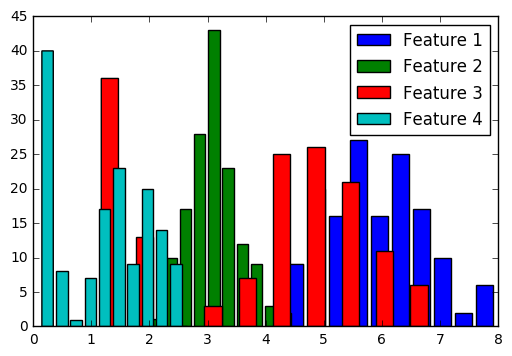

In [50]:
##### 1B #####
plt.hist(X[:,0],label="Feature 1",rwidth=0.8)
plt.hist(X[:,1],label="Feature 2",rwidth=0.8)
plt.hist(X[:,2],label="Feature 3",rwidth=0.5)
plt.hist(X[:,3],label="Feature 4",rwidth=0.8)

plt.legend()
plt.show()


### Problem 1C

In [51]:
##### 1C #####
#(np.mean, np.std)
mean_one = np.mean(X[:,0])
std_one = np.std(X[:,0])
print("Mean of Feature 1: {:32}".format(mean_one))
print("Standard deviation of Feature 1: {:18}\n".format(std_one))

mean_two = np.mean(X[:,1])
std_two = np.std(X[:,1])
print("Mean of Feature 2: {:32}".format(mean_two))
print("Standard deviation of Feature 2: {:20}\n".format(std_two))

mean_three = np.mean(X[:,2])
std_three = np.std(X[:,2])
print("Mean of Feature 3: {:33}".format(mean_three))
print("Standard deviation of Feature 3: {:19}\n".format(std_three))

mean_four = np.mean(X[:,3])
std_four = np.std(X[:,3])
print("Mean of Feature 4: {:33}".format(mean_four))
print("Standard deviation of Feature 4: {:19}".format(std_four))

Mean of Feature 1:                5.900103764189188
Standard deviation of Feature 1:  0.833402066774894

Mean of Feature 2:                3.098930916891892
Standard deviation of Feature 2:  0.43629183800107685

Mean of Feature 3:                3.8195548405405404
Standard deviation of Feature 3:  1.7540571093439352

Mean of Feature 4:                1.2525554845945945
Standard deviation of Feature 4:  0.7587724570263247


### Problem 1D

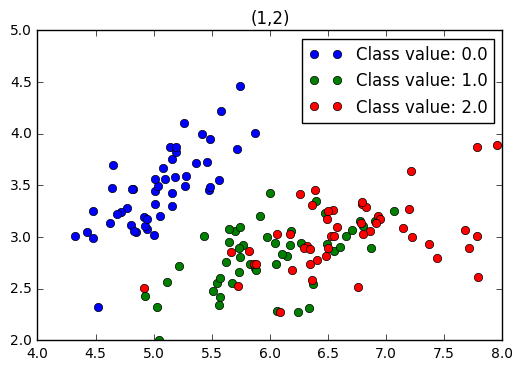

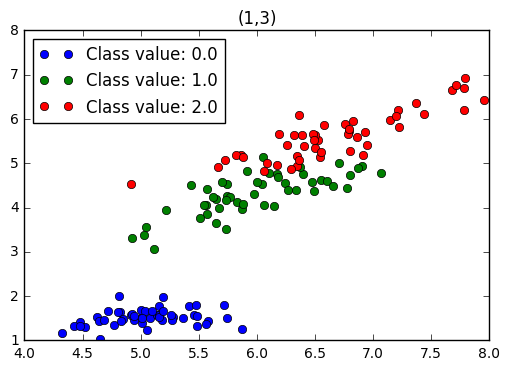

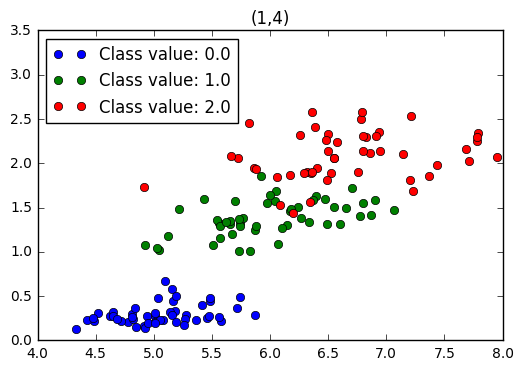

In [52]:
##### 1D #####
# for (1,2) (1,3) and (1,4)  plt.plot or plt.scatter

colors = ['b','g','r']

for c in np.unique(Y):
    plt.plot(X[Y==c, 0], X[Y==c,1], 'o', label = "Class value: {}".format(c), color = colors[int(c)])
    
plt.title('(1,2)')
ax = plt.gca()
ax.set_ylim([2.0,5])
plt.legend(loc='best')
plt.show()

for c in np.unique(Y):
    plt.plot(X[Y==c, 0], X[Y==c,2], 'o', label = "Class value: {}".format(c), color = colors[int(c)])

plt.title('(1,3)')
ax = plt.gca()
ax.set_ylim([1,8])
plt.legend(loc='best')
plt.show()

for c in np.unique(Y):
    plt.plot(X[Y==c, 0], X[Y==c,3], 'o',label = "Class value: {}".format(c),color = colors[int(c)])

plt.title('(1,4)')
ax = plt.gca()
ax.set_ylim([0,3.5])
plt.legend(loc='best')
plt.show()

## Problem 2A

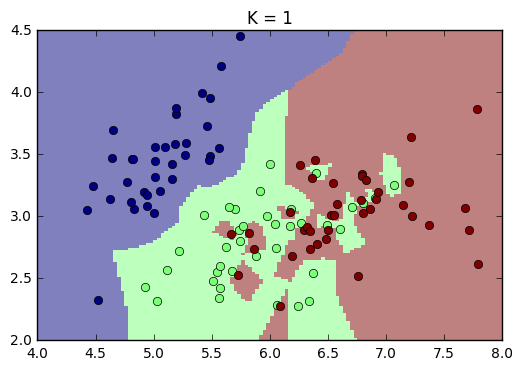

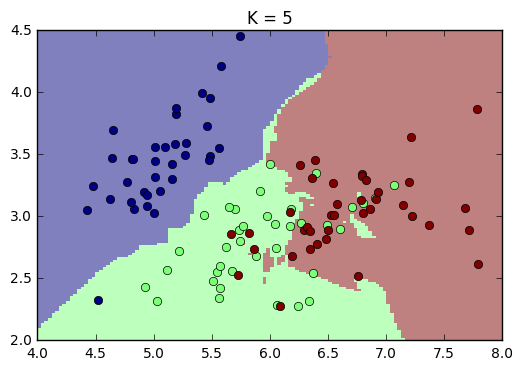

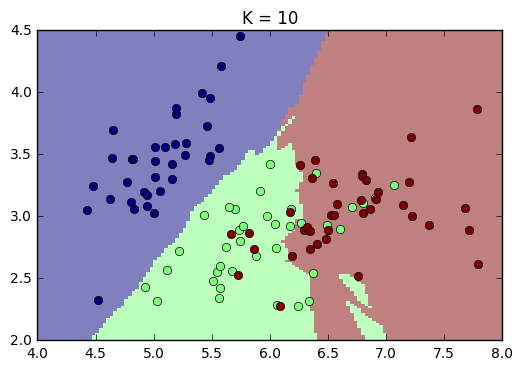

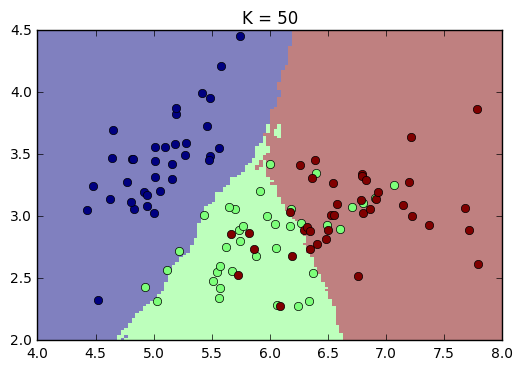

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

##### PROBLEM 2 #####
iris = np.genfromtxt("data/iris.txt", delimiter = None)


# Note: indexing with ":" indicates all values (in this case, all rows)
# indexing with a value ("0", "1", "-1", etc.) extracts only that one value (here, columns);
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.
Y = iris[:,-1]   # last column (0,1,2,3,-1)
X = iris[:,0:2]  # first 2 feature columns out of 4


X,Y = ml.shuffleData(X,Y)  # Shuffles the ordered Iris data

# split it into Xtrain, XValidation, Ytrain, Yvalidation
# Xtr = 75% of X[0:2]
# Xva = 25% of X[0:2]
Xtr, Xva, Ytr, Yva = ml.splitData(X,Y, 0.75) # split it into 75/25 train/validation


# K = 1
knn = ml.knn.knnClassify() #create object
knn.train(Xtr, Ytr, 1)     #train Xtr with Ytr where K is an integer, e.g. 1 for nearest neighbor prediction

YvaHat = knn.predict(Xva)  #get estimates of y hat validation for each data point in Xvalidatiaon

ml.plotClassify2D( knn, Xtr, Ytr ) # make 2D classification plot with data (Xtr,Ytr)
plt.title("K = 1")
plt.show()

### Alternatively, the constructor provides a shortcut to "train":
##  knn = ml.knn.knnClassify( Xtr, Ytr, K );
##  YvaHat = predict( knn, Xva );

# K = 5
knn = ml.knn.knnClassify( Xtr, Ytr, 5 )
YvaHat = knn.predict(Xva);

ml.plotClassify2D( knn, Xtr, Ytr )
plt.title("K = 5")
plt.show()

# K = 10
knn = ml.knn.knnClassify( Xtr, Ytr, 10 )
YvaHat = knn.predict(Xva);

ml.plotClassify2D( knn, Xtr, Ytr ) 
plt.title("K = 10")
plt.show()

# K = 50
knn = ml.knn.knnClassify( Xtr, Ytr, 50 )
YvaHat = knn.predict(Xva)

ml.plotClassify2D( knn, Xtr, Ytr )
plt.title("K = 50")
plt.show()

## Problem 2B

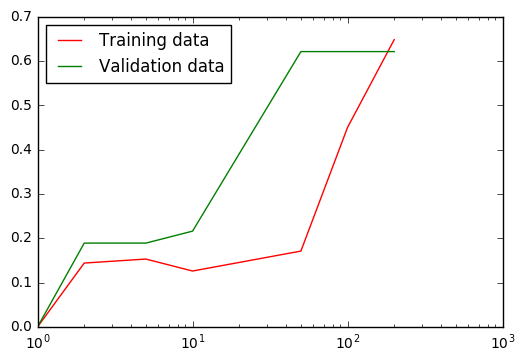

In [54]:
##### 2B #####

K =[1,2,5,10,50,100,200]

errTrain = []
#Training data
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr,k) # TRAIN MODEL (sample, training, group)
    Yhat = learner.predict(Xtr)              # PREDICT RESULTS ON TRAINING DATA
    errTrain.append(learner.err(Xtr, Ytr))      # "" TO COUNT FRACTION OF WRONG PREDICTIONS
    
plt.semilogx(K, errTrain, 'r', label = "Training data")                    # "" Average and Plot results on semi-log scale



errTrain2 = []
#Validation data
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xva,Yva,k) # TRAIN MODEL (sample, training, group)
    Yhat = learner.predict(Xva)       # PREDICT RESULTS ON VALIDATION DATA
    errTrain2.append(learner.err(Xva,Yva))                 # "" TO COUNT FRACTION OF WRONG PREDICTIONS
    
plt.semilogx(K, errTrain2, 'g', label = "Validation data")                     # "" Average and Plot results on semi-log scale

plt.legend(loc = 'best')
plt.show()

#### Based off the plot above, K = 2 seems to give the smallest percentage of errors after training the knn classifier.

## Problem 3A

p(y = 1) = 4/10

p(y = -1) = 6/10

Probability of feature, given the email was read &emsp;&emsp;&emsp;  Probability without feature, given email was read

p(x<sub>1</sub> = 1|y = 1) = 3/4  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>1</sub> = 0|y = 1) = 1/4

p(x<sub>2</sub> = 1|y = 1) = 0/4 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>2</sub> = 0|y = 1) = 4/4

p(x<sub>3</sub> = 1|y = 1) = 3/4 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>3</sub> = 0|y = 1) = 1/4  

p(x<sub>4</sub> = 1|y = 1) = 2/4 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>4</sub> = 0|y = 1) = 2/4

p(x<sub>5</sub> = 1|y = 1) = 1/4 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>5</sub> = 0|y = 1) = 3/4



Probability of feature, given the email was discarded &emsp; Probability without feature, given email was read

p(x<sub>1</sub> = 1|y = -1) = 3/6 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>1</sub> = 0|y = -1) = 3/6

p(x<sub>2</sub> = 1|y = -1) = 5/6 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>2</sub> = 0|y = -1) = 1/6

p(x<sub>3</sub> = 1|y = -1) = 4/6 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>3</sub> = 0|y = -1) = 2/6
 
p(x<sub>4</sub> = 1|y = -1) = 5/6 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>4</sub> = 0|y = -1) = 1/6

p(x<sub>5</sub> = 1|y = -1) = 2/6 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p(x<sub>5</sub> = 0|y = -1) = 4/6



## Problem 3B

For x = (0,0,0,0,0), 

p(**y = 1**) \* p(**x(0,0,0,0,0)**) = 4/10 \* 1/4 \* 4/4 \* 1/4 \* 2/4 \* 3/4 = 0.009375

p(**y = -1**) \* p(**x(0,0,0,0,0)**) = 6/10 \* 3/6 \* 1/6 \* 2/6 \* 1/6 \* 4/6 = 0.001852

The class predicted is **y = 1**

<br></br>

For x = (1,1,0,1,0),

p(**y = 1**) \* p(**x(1,1,0,1,0)**) = 4/10 \* 3/4 \* 0/4 \* 1/4 \* 2/4 \* 3/4 = 0.0000

p(**y = -1**) \* p(**x(1,1,0,1,0)**) = 6/10 \* 3/6 \* 5/6 \* 2/6 \* 5/6 \* 4/6 = 0.0463

The class predicted is **y = -1**

## Problem 3C

Probability of y = 1 given x = (1, 1, 0, 1, 0) is 0, because only x<sub>2</sub> = 0 were under the class y = 1.


p(**y = 1**) = 4/10

p(**x(1,1,0,1,0)** | **y = 1**) = 3/4 \* 0/4 \* 3/4 \* 2/4 \* 1/4 = 0

<br></br>

p(**y = 1** | **x(1,1,0,1,0)**) 

= p(**y = 1**) \* p(**x(1,1,0,1,0)** | **y = 1**) / p(x = (1,1,0,1,0))

= 4/10 * 0

= **0**



## Problem 3D

We probably shouldn't use a joint Bayes classifier because if a certain combination of features for a class doesn't exist, the joint probability instantly results in 0, which wouldn't be as accurate as if we used naive Bayes.

## Problem 3E

If the author column x<sub>1</sub> is lost, then we should retrain the model, because even though it doesn't affect class y = -1, it affects class y = 1.

We will retrain it by recalculating all the probabilities for classfiers, and because we don't need to recalculate the independent individual given probabilities, the process will be faster.  The decision boundary may shift depending on how much impact that feature had in the training.  If it had similar probabilities for all classes, then it wouldn't shift as much, but if there's a large bias, then it would shift more.

The model will have only 16 class predictions instead of 32, with parameters of x = (x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>, x<sub>5</sub>).